<a href="https://colab.research.google.com/github/Farjana-Yesmin/Farjana-Yesmin/blob/main/Credit_Card_Fraud_Detection_Using_Machine_Learning_A_Comprehensive_Analysis_of_Model_Performance%2C_Data_Imbalance_Handling%2C_and_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# If using Kaggle API, make sure to install Kaggle package first:
# !pip install kaggle

# Then, download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 74% 49.0M/66.0M [00:00<00:00, 113MB/s]
100% 66.0M/66.0M [00:00<00:00, 118MB/s]


In [ ]:
!unzip creditcardfraud.zip

In [ ]:
import pandas as pd

   # Load data into DataFrame
   df = pd.read_csv('creditcard.csv')  # Update path if needed

In [2]:
# If using Kaggle API, make sure to install Kaggle package first:
# !pip install kaggle

# Then, download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Unzip the downloaded dataset
!unzip creditcardfraud.zip

import pandas as pd

# Load data into DataFrame
df = pd.read_csv('creditcard.csv')  # Path is correct now after unzipping

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 92% 61.0M/66.0M [00:00<00:00, 147MB/s]
100% 66.0M/66.0M [00:00<00:00, 134MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC AUC Score: 0.9465218839364671


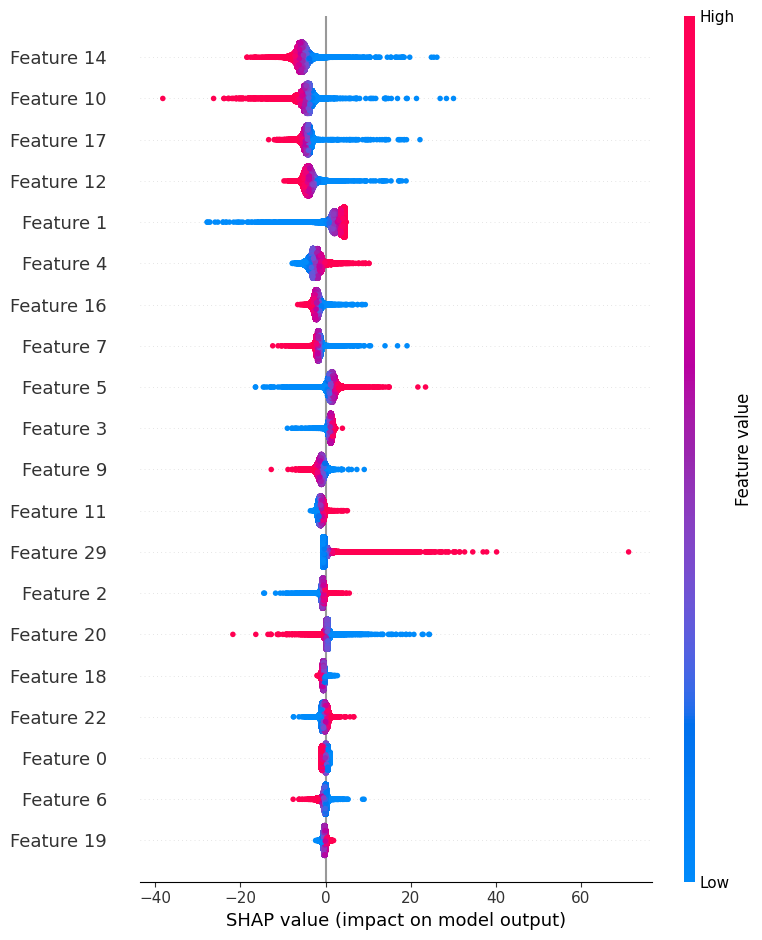

In [6]:
import shap

# Initialize SHAP explainer
explainer = shap.LinearExplainer(lr, X_train_res)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)
